In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Read the csv file
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
# duplicated values
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [31]:
df.shape

(768, 9)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

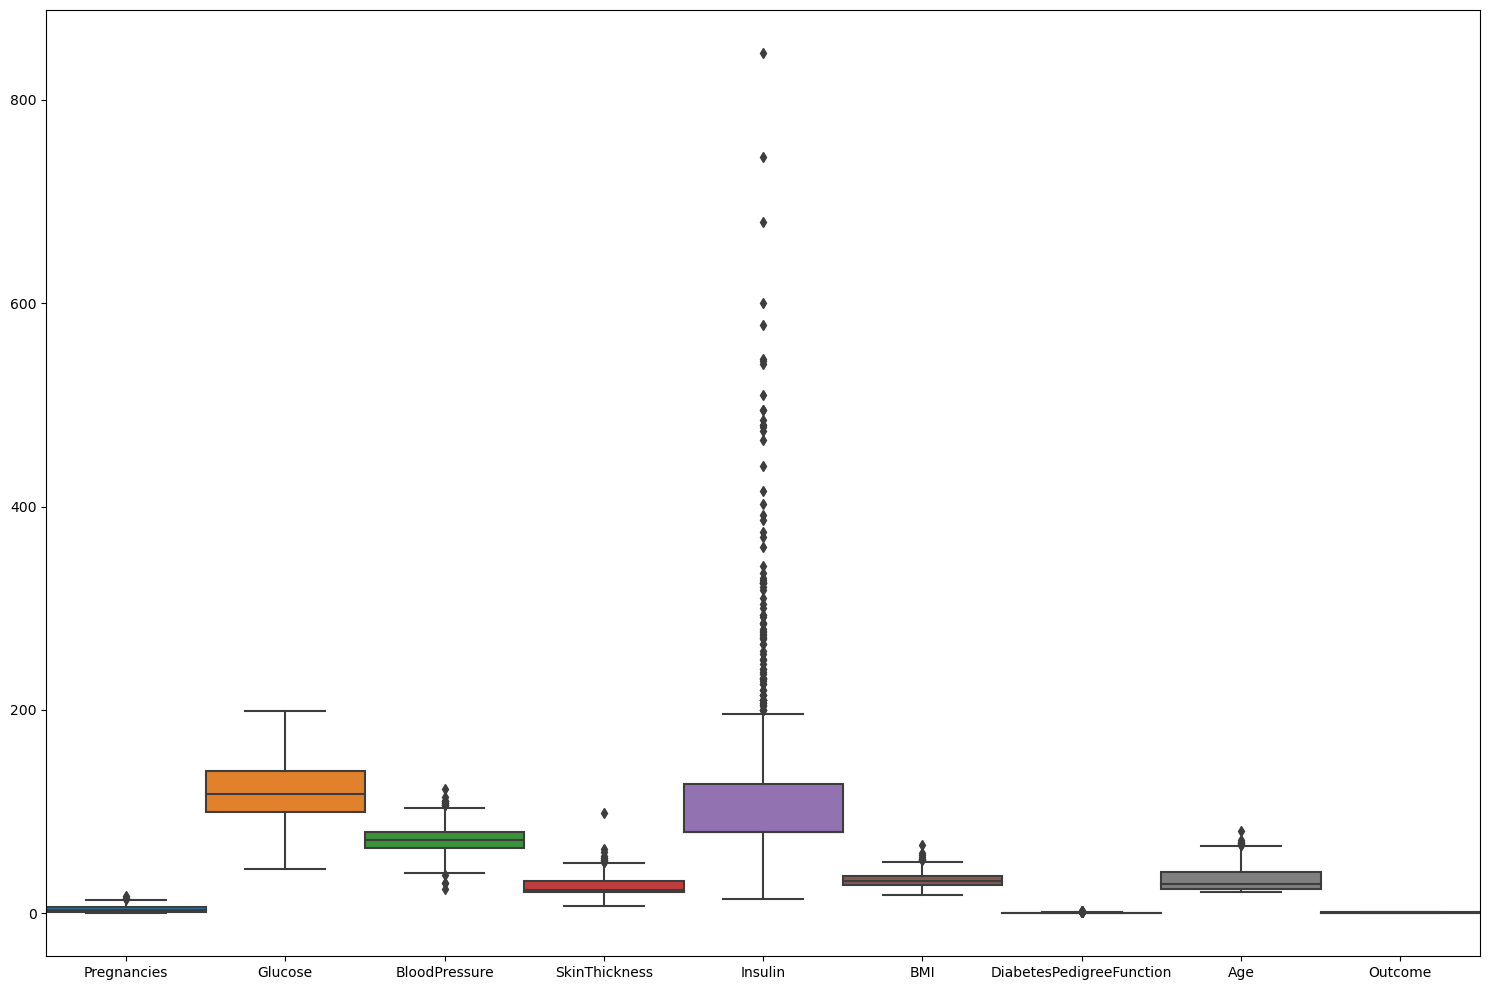

In [50]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(df,width=1)
plt.tight_layout()

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [58]:
# Independent and Dependent Data
X = df.drop(columns= ['Outcome'])
y = df['Outcome']

In [59]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [60]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [63]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [67]:
# Scaldown the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled

array([[-1.12883757,  0.13045131,  0.9509658 , ..., -0.28848184,
         0.11517622, -0.77535884],
       [ 0.37269247,  0.06480929,  0.13380231, ...,  0.19116892,
        -0.7679917 ,  0.41886882],
       [-0.82853156, -0.46032682, -1.01022659, ...,  0.40919199,
        -0.19393255, -0.77535884],
       ...,
       [ 0.67299848, -0.98546293,  1.6046966 , ..., -1.85824795,
        -0.86219627, -0.43415093],
       [-0.52822555, -0.46032682, -0.84679389, ..., -1.08789976,
        -1.03882986, -1.03126476],
       [-1.12883757,  0.39301937, -1.17365928, ..., -0.91348131,
        -0.37939781, -1.03126476]])

In [69]:
X_test_scaled

array([[-1.12883757,  0.29455634, -0.26616092, ...,  1.52837709,
        -0.62079704, -0.60475489],
       [ 2.17452853,  0.42584037, -0.26616092, ...,  2.85105038,
         0.28592202,  0.58947277],
       [ 0.37269247, -0.88699991, -0.02963039, ...,  0.72895916,
        -0.32640774, -0.51945291],
       ...,
       [ 1.87422252, -0.3618638 , -0.19306309, ..., -0.75359772,
        -1.00055925,  0.58947277],
       [-0.22791954, -0.8541789 , -1.33709198, ..., -1.16057412,
         1.36338688,  0.5041708 ],
       [ 0.07238646, -0.23057977, -0.02963039, ..., -0.55010952,
        -0.30874438,  1.10128463]])

In [72]:
# Dump the data for further predication
import pickle
file = open('standardScalar.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [73]:
# Performing Logistic Regression
classifier = LogisticRegression()

In [74]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [81]:
# Hypertunning metrix
# GridSearchCV

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters = {
       'penalty' : ['l1','l2'], 
       'C'       : np.logspace(-3,3,7),
       'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [84]:
clf = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [85]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [86]:
clf.best_score_

0.7788207297726071

In [88]:
classifier = LogisticRegression(C=0.1, penalty= 'l2', solver='liblinear')

In [91]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [93]:
y_pred = classifier.predict(X_test_scaled)

In [94]:
classifier.predict_proba(X_test_scaled)

array([[0.56433778, 0.43566222],
       [0.08239702, 0.91760298],
       [0.76327592, 0.23672408],
       [0.68569035, 0.31430965],
       [0.88127111, 0.11872889],
       [0.76846397, 0.23153603],
       [0.85888157, 0.14111843],
       [0.66454356, 0.33545644],
       [0.68406895, 0.31593105],
       [0.70013064, 0.29986936],
       [0.90396038, 0.09603962],
       [0.77691028, 0.22308972],
       [0.33285669, 0.66714331],
       [0.39395338, 0.60604662],
       [0.12099439, 0.87900561],
       [0.20945529, 0.79054471],
       [0.8235915 , 0.1764085 ],
       [0.23814028, 0.76185972],
       [0.92746779, 0.07253221],
       [0.97244601, 0.02755399],
       [0.28102799, 0.71897201],
       [0.91818865, 0.08181135],
       [0.88954609, 0.11045391],
       [0.69044367, 0.30955633],
       [0.25934603, 0.74065397],
       [0.45218586, 0.54781414],
       [0.88602342, 0.11397658],
       [0.98025897, 0.01974103],
       [0.77042322, 0.22957678],
       [0.7803029 , 0.2196971 ],
       [0.

In [95]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [96]:
y_test

78     1
193    1
77     0
336    0
752    0
      ..
495    0
313    0
667    1
396    0
406    1
Name: Outcome, Length: 154, dtype: int64

In [100]:
# Accuracy 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7467532467532467

In [103]:
# Confusion Metrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[89, 11],
       [28, 26]])

In [104]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [107]:
# MOdel Accuracy 
Accuarcy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)
Accuarcy

0.7467532467532467

In [109]:
# Precision
Precision = true_positive/(true_positive + false_positive)
Precision

0.89

In [112]:
# Recall 
Recall = true_positive/(true_positive + false_negative) 
Recall

0.7606837606837606

In [115]:
# F1 score 
F1_score = 2 * (Precision * Recall)/(Precision + Recall)
F1_score

0.8202764976958524

In [117]:
import pickle
file = open('Prediction.pkl','wb')
pickle.dump(classifier,file)
file.close()